In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/noisyswissroll/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll()

X.shape =  (10260, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=13, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2565 points processed...
A_k, Atilde_k: 5130 points processed...
A_k, Atilde_k: 7695 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2565 points processed...
local_param: 5130 points processed...
local_param: 7695 points processed...
local_param: all 10260 points processed...
After iter 1, max distortion is 66.830853
After iter 2, max distortion is 57.723175
After iter 3, max distortion is 47.588910
After iter 4, max distortion is 45.592165
After iter 5, max distortion is 45.180336
After iter 6, max distortion is 45.180336
After iter 7, max distortion is 45.180336
After iter 8, max distortion is 45.180336
After iter 9, max distortion is 45.180336
After iter 10, max distortion is 45.180336
After iter 11, max distortion is 45.180336
Max local distortion = 45.18033610500794
###############
Took 96.6 seconds to perform st

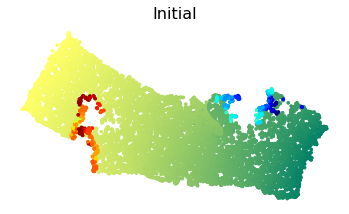

###############
Took 16.6 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.001451791962051039


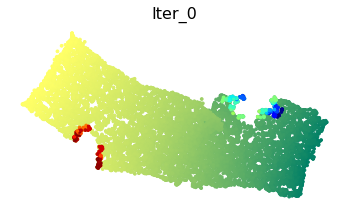

Iteration: 1
error: 0.0013798869527926595
Iteration: 2
error: 0.0012791048935133736
Iteration: 3
error: 0.0012371659769830512
Iteration: 4
error: 0.001203706168371681
Iteration: 5
error: 0.0011905211304416626


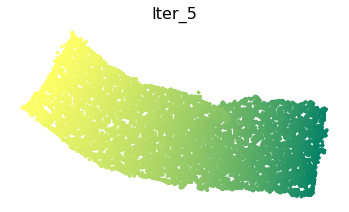

Iteration: 6
error: 0.0011841747752257133
Iteration: 7
error: 0.0011806766381728926
Iteration: 8
error: 0.001178744092064739
Iteration: 9
error: 0.0011773655447174355
Iteration: 10
error: 0.0011763474551946323


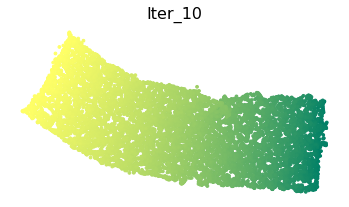

Iteration: 11
error: 0.0011755287055742968
Iteration: 12
error: 0.0011746693563947077
Iteration: 13
error: 0.0011737864207762149
Iteration: 14
error: 0.0011731459941536652
Iteration: 15
error: 0.0011719143144955685


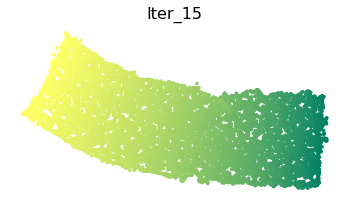

Iteration: 16
error: 0.0011711588673324967
Iteration: 17
error: 0.0011701315333507952
Iteration: 18
error: 0.0011692061023963092
Iteration: 19
error: 0.001168298419689574


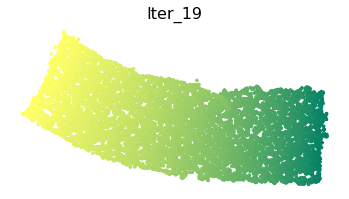

###############
Took 372.8 seconds to refine global embedding.
###############
###############
Took 392.7 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [21]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=50, n_components=2, n_jobs=-1, random_state=42)

In [22]:
y_ltsa = ltsa_obj.fit_transform(X)

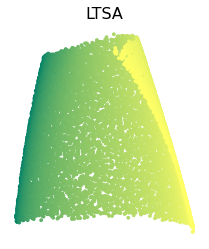

In [23]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [24]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [25]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.05, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [26]:
y_umap = umap_obj.fit_transform(X)

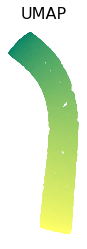

In [27]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [28]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [29]:
tsne_obj = TSNE(perplexity=60, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [30]:
y_tsne = tsne_obj.fit_transform(X)

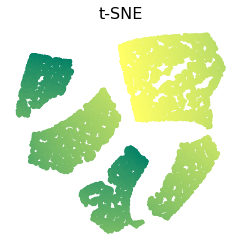

In [31]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')